In [2]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

In [4]:
import numpy as np
import pandas as pd

In [5]:
a = tf.add(3,5)
print(a)

Tensor("Add:0", shape=(), dtype=int32)


In [7]:
sess = tf.Session()

print(sess.run(a))

sess.close()

8


In [8]:
with tf.Session() as sess:
    print(sess.run(a))

8


In [18]:
x = 2
y = 3

op1 = tf.add(x,y)
op2 = tf.multiply(x,y)
useless = tf.multiply(x,op1)
op3 = tf.pow(op2,op1)

with tf.Session() as sess:
    op3, useless = sess.run([op3, useless])
    print(op3, useless)

7776 10


# 03 - Linear Regression

In [21]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [90]:
# 데이터 로드
x_data = datasets.fetch_openml(name='boston',version=1).data.iloc[:,12]
y_data = datasets.fetch_openml(name='boston',version=1).target

In [89]:
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [91]:
w = tf.Variable(tf.random_normal([1])) # parameter 세타 정규분포로부터 랜덤하게 초기화
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b

loss = tf.reduce_mean(tf.square(y_predicted - y_data)) # MSE (평균 제곱 오차)
optimizer = tf.train.GradientDescentOptimizer(0.001) # learning rate
train = optimizer.minimize(loss)

In [98]:
# for name in dir(tf.train):
#     if 'Optimizer' in name:
#         print(name)

In [102]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variable 초기화

    for step in range(10000): # epoch
        sess.run(train) # 실제 gradient descent 실행되는 코드

        # 1천번마다 확인용
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w),sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()
        #################

    w_out, b_out = sess.run([w,b]) # 마지막 세타값으로 run

Step 0: w [0.3779239] b [0.0841812]
loss 440.3485107421875

Step 1000: w [0.32782063] b [13.269212]
loss 147.76034545898438

Step 2000: w [-0.15996341] b [21.393906]
loss 80.25692749023438

Step 3000: w [-0.46154943] b [26.417225]
loss 54.4522590637207

Step 4000: w [-0.6480176] b [29.523098]
loss 44.587642669677734

Step 5000: w [-0.7633086] b [31.443424]
loss 40.816612243652344

Step 6000: w [-0.83458996] b [32.63071]
loss 39.37507247924805

Step 7000: w [-0.8786624] b [33.364796]
loss 38.823997497558594

Step 8000: w [-0.90591127] b [33.818665]
loss 38.61333465576172

Step 9000: w [-0.9227593] b [34.099285]
loss 38.532806396484375



In [103]:
w_out

array([-0.9331684], dtype=float32)

In [104]:
b_out

array([34.272663], dtype=float32)

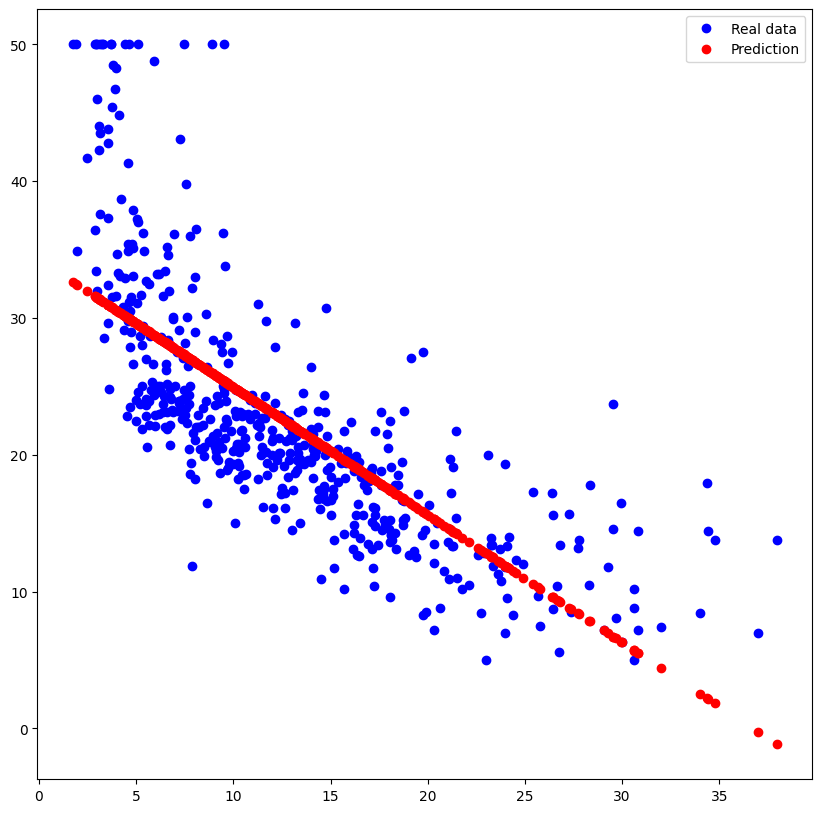

In [105]:
plt.figure(figsize= (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

# 04 - 2-Layer Neural-Network 1

In [107]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [108]:
x_data = datasets.fetch_openml(name='boston',version=1).data.iloc[:,12]
y_data = datasets.fetch_openml(name='boston',version=1).target

df = pd.DataFrame([x_data,y_data]).transpose()
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [111]:
_x_data = tf.reshape(x_data, [len(x_data),1]) # 506행 1열

W = tf.Variable(tf.random_normal([1,5], dtype=tf.float64)) # 1행 5열
W_out = tf.Variable(tf.random_normal([5,1], dtype=tf.float64)) # 5행 1열

hidden = tf.nn.sigmoid(tf.matmul(_x_data, W)) # 506행 5열
output = tf.matmul(hidden, W_out) # 506행 1열

In [113]:
loss = tf.reduce_mean(tf.square(output - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [114]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output)

Step 0 || Loss : 635.3696832300408
Step 5000 || Loss : 84.45979477839795
Step 10000 || Loss : 84.44359592986544
Step 15000 || Loss : 84.43693789056368
Step 20000 || Loss : 84.43325293425167
Step 25000 || Loss : 84.43089561840097
Step 30000 || Loss : 84.42925088076043
Step 35000 || Loss : 84.42803467483232
Step 40000 || Loss : 84.4270970392462
Step 45000 || Loss : 84.42635107316485


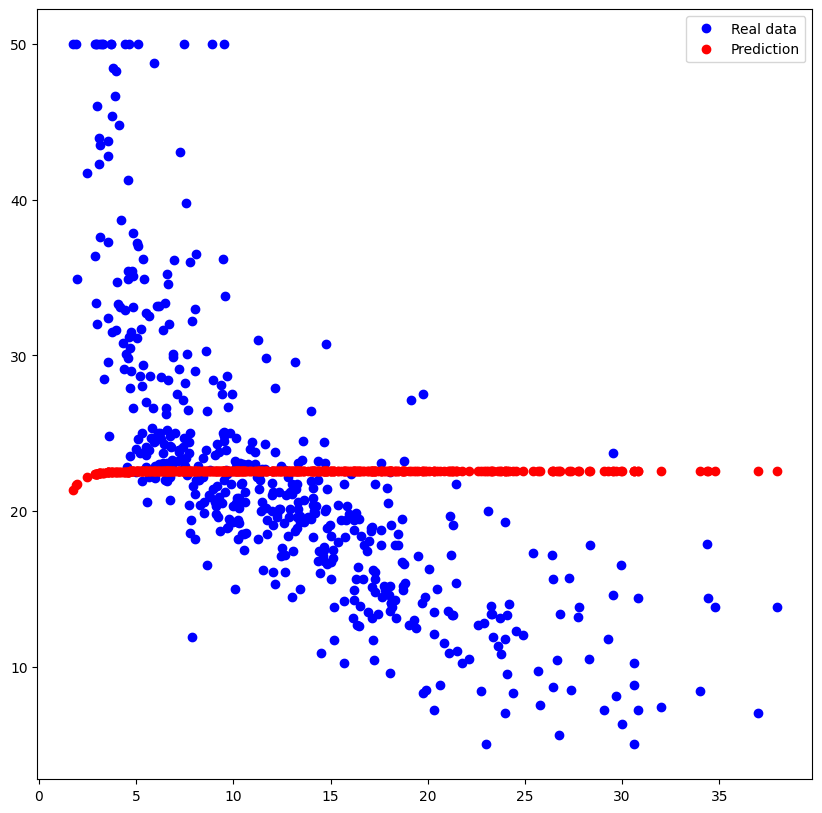

In [116]:
plt.figure(figsize=(10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

In [ ]:
# hidden layer 추가

In [126]:
_x_data = tf.reshape(x_data, [len(x_data),1]) # 506행 1열
_y_data = tf.reshape(y_data, [len(y_data),1]) 

W1 = tf.Variable(tf.random_normal([1,5], dtype=tf.float64)) # 1행 5열
W2 = tf.Variable(tf.random_normal([5,10], dtype=tf.float64)) # 5행 10열
W_out = tf.Variable(tf.random_normal([10,1], dtype=tf.float64)) # 10행 1열

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1)) # 506행 5열
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2)) # 506행 10열
output = tf.matmul(hidden2, W_out) # 506행 1열

In [127]:
# loss = tf.reduce_mean(tf.square(output - y_data))
loss = tf.losses.mean_squared_error(output, _y_data)

optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

In [128]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print("Step {} || Loss : {}".format(step, sess.run(loss)))

    output = sess.run(output)

Step 0 || Loss : 2500.126708984375
Step 5000 || Loss : 32.213253021240234
Step 10000 || Loss : 27.440462112426758
Step 15000 || Loss : 27.28797721862793
Step 20000 || Loss : 27.085315704345703
Step 25000 || Loss : 26.656949996948242
Step 30000 || Loss : 26.47324562072754
Step 35000 || Loss : 26.40346908569336
Step 40000 || Loss : 26.363052368164062
Step 45000 || Loss : 26.343629837036133


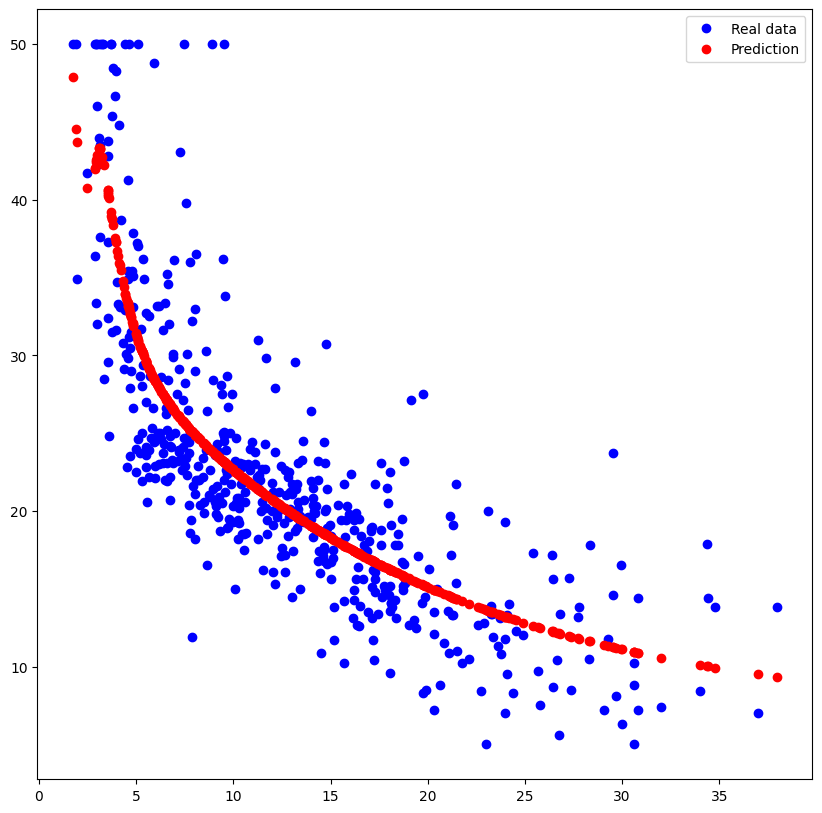

In [129]:
plt.figure(figsize=(10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

# 08 - Classification

In [130]:
from tensorflow.keras import datasets

(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [133]:
print(train_data.shape)
print(test_data.shape)

(60000, 28, 28)
(10000, 28, 28)


In [134]:
print(train_label.shape)
print(test_label.shape)

(60000,)
(10000,)


In [135]:
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [137]:
train_data[0].shape

(28, 28)

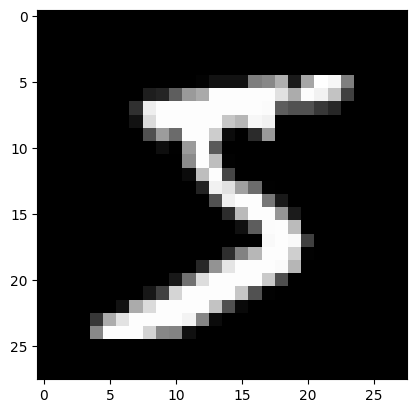

In [139]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap='gray')

In [141]:
print(train_data.min())
print(train_data.max())

0
255


In [144]:
# 각 이미지 28 x 28 -> 1 x 784
# 각 픽셀 0 ~ 255 -> 0 ~ 1

train_data = train_data.reshape(60000, 28*28) / 255.0
test_data = test_data.reshape(10000, 28*28) / 255.0

In [145]:
train_data.shape

(60000, 784)

In [146]:
#  One-hot encoding

In [147]:
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [148]:
from tensorflow.keras import utils

train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

In [149]:
train_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [150]:
import pandas as pd

pd.DataFrame(train_label).head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [151]:
train_label[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [152]:
# Build the model

In [153]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.logging.set_verbosity(tf.logging.ERROR)

In [154]:
X = tf.placeholder(tf.float32, [None, 784]) # 28 x 28
Y = tf.placeholder(tf.float32, [None, 10]) # 0 ~ 9

In [163]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01)) # 256 == hidden layer node 수
L1 = tf.nn.relu(tf.matmul(X, W1))

In [165]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [167]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3) # 마지막 층

In [168]:
# cost = tf.losses.mean_squared_error(Y, model) # 회귀 분석

cost = tf.losses.softmax_cross_entropy(Y, model) # 분류

optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [194]:
# train 시작

In [171]:
init = tf.global_variables_initializer()
sess = tf.Session() # 원래는 with문으로 해야함
sess.run(init)

In [195]:
batch_size = 100 # 100행씩
total_batch = int(len(train_data) / batch_size)
print(total_batch)

600


In [196]:
import tqdm

# 전체 iteration 수 == Gradient descent 횟수 == 15 * 600 == 9000번

for epoch in tqdm.tqdm(range(15)):

    total_cost = 0 # epoch마다 평균 에러 값 계산용
    batch_idx = 0 # batch마다 꺼낼 데이터의 시작 인덱스 값

    for i in range(total_batch):
        # batch size(100행)만큼
        batch_x = train_data[ batch_idx: batch_idx + batch_size ]
        batch_y = train_label[ batch_idx : batch_idx + batch_size ]

        sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y}) # 데이터 밀어넣기

        # cross entropy 값 추가 (epoch 끝나고 평균 계산용)
        batch_cost = sess.run(cost, feed_dict={X: batch_x, Y: batch_y})
        total_cost = total_cost + batch_cost

        # next iteration
        batch_idx += batch_size

    # 한 epoch 끝난 시점
    training_cost = total_cost / total_batch # cross entropy 계산 (600으로 나눈 평균)

    test_cost = sess.run(cost, feed_dict={X: test_data, Y: test_label}) # test data 기준 cross entropy

    print('Epoch: {}'.format(epoch + 1),
          '|| Avg. Training cost = {:.3f}'.format(training_cost),
          '|| Current Test cost = {:.3f}'.format(test_cost))

print('Learning process is completed!')
    
    

  7%|██▉                                         | 1/15 [00:02<00:30,  2.17s/it]

Epoch: 1 || Avg. Training cost = 0.077 || Current Test cost = 0.105


 13%|█████▊                                      | 2/15 [00:04<00:26,  2.03s/it]

Epoch: 2 || Avg. Training cost = 0.070 || Current Test cost = 0.101


 20%|████████▊                                   | 3/15 [00:06<00:23,  1.97s/it]

Epoch: 3 || Avg. Training cost = 0.064 || Current Test cost = 0.098


 27%|███████████▋                                | 4/15 [00:07<00:20,  1.86s/it]

Epoch: 4 || Avg. Training cost = 0.059 || Current Test cost = 0.096


 33%|██████████████▋                             | 5/15 [00:09<00:18,  1.81s/it]

Epoch: 5 || Avg. Training cost = 0.053 || Current Test cost = 0.094


 40%|█████████████████▌                          | 6/15 [00:11<00:18,  2.01s/it]

Epoch: 6 || Avg. Training cost = 0.049 || Current Test cost = 0.092


 47%|████████████████████▌                       | 7/15 [00:13<00:15,  1.90s/it]

Epoch: 7 || Avg. Training cost = 0.044 || Current Test cost = 0.091


 53%|███████████████████████▍                    | 8/15 [00:15<00:12,  1.82s/it]

Epoch: 8 || Avg. Training cost = 0.040 || Current Test cost = 0.091


 60%|██████████████████████████▍                 | 9/15 [00:16<00:10,  1.77s/it]

Epoch: 9 || Avg. Training cost = 0.037 || Current Test cost = 0.090


 67%|████████████████████████████▋              | 10/15 [00:18<00:08,  1.75s/it]

Epoch: 10 || Avg. Training cost = 0.033 || Current Test cost = 0.090


 73%|███████████████████████████████▌           | 11/15 [00:20<00:06,  1.70s/it]

Epoch: 11 || Avg. Training cost = 0.030 || Current Test cost = 0.090


 80%|██████████████████████████████████▍        | 12/15 [00:21<00:05,  1.67s/it]

Epoch: 12 || Avg. Training cost = 0.027 || Current Test cost = 0.091


 87%|█████████████████████████████████████▎     | 13/15 [00:23<00:03,  1.67s/it]

Epoch: 13 || Avg. Training cost = 0.024 || Current Test cost = 0.092


 93%|████████████████████████████████████████▏  | 14/15 [00:25<00:01,  1.71s/it]

Epoch: 14 || Avg. Training cost = 0.022 || Current Test cost = 0.093


100%|███████████████████████████████████████████| 15/15 [00:26<00:00,  1.80s/it]

Epoch: 15 || Avg. Training cost = 0.020 || Current Test cost = 0.094
Learning process is completed!


In [182]:
# Test the model

In [183]:
test_data.shape

(10000, 784)

In [186]:
# 첫 행 꺼내기 == 이미지 한 장 꺼내기
test_data[0:1, :].shape

(1, 784)

In [197]:
sess.run(model, feed_dict={X: test_data[0:1, :]})

array([[ -8.561029 ,  -9.800459 ,  -1.4342799,   1.1588082, -22.056238 ,
        -12.601114 , -31.626274 ,  14.057189 ,  -1.6290494,  -1.2048848]],
      dtype=float32)

In [198]:
import numpy as np

np.argmax(sess.run(model, feed_dict={X: test_data[0:1, :]}), axis=1)

array([7])

In [199]:
# 10개 숫자 중 첫 행의 가장 큰 값의 index 얻기 (argmax와 동일)
sess.run(tf.argmax(model, 1), feed_dict={X: test_data[0:1, :]})

array([7])

In [200]:
np.argmax(test_label[0:1, :],axis=1)

array([7])

In [201]:
# 정확도 계산

In [202]:
# tf.argmax(model, 1)   -> [1, 1, 0, 0]
# tf.argmax(Y, 1)       -> [1, 0, 1, 0]
# tf.equal(..., ...)    -> [True, False, False, True]
# tf.cast(...)          -> [1.0, 0.0, 0.0, 1.0]    형 변환
# tf.reduce_mean(...)   -> 0.5   평균

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y,1)) #  model : 예측값, Y : 실제 정답
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [205]:
# 10000장의 test data 정확도 계산
print('정확도 :', sess.run(accuracy, feed_dict={X: test_data, Y: test_label}))

정확도 : 0.9742


In [206]:
test_data[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [207]:
# 모델 예측 결과값

predicted_labels = sess.run(tf.argmax(model, 1), feed_dict={X: test_data})
print(list(predicted_labels)[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [209]:
test_label[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [210]:
# 실제 정답

import numpy as np

print(np.argmax(test_label, axis=1)[:10])

[7 2 1 0 4 1 4 9 5 9]
